In [3]:
#Initialisation
import h5py
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import re


In [6]:
location = 'C:\\Users\\Danita\\Desktop\\sensorCityData\\06Oct\\2016-10-24'
var =[0,0]
for filename in os.listdir(location):

    fullPath = os.path.join(location, filename)
    soundData = h5py.File(fullPath , 'r')
    energyVal = soundData.get('energy') 
    energyArray= np.array(energyVal)
    avg=0
    count=0
    for val in range(4,5):
        avgofRow = np.average(energyArray[val])
        if np.isfinite(avgofRow):
            count= count +1
            avg = np.average(energyArray[val])+avg
            
        
    filename= filename[6:-32]
    var = np.vstack((var, [filename, avg/count]))
#print var

       
   
            
           

In [51]:
location = 'C:\\Users\\Danita\\Desktop\\sensorCityData\\04Oct\\GIT_cc14a7a227c856aee6e0b541b97a77aabb8d3307-2016-10-21-17-13\\ptne\\hdf5\\2016-10-21'
var1=[0,0]
for filename in os.listdir(location):

    fullPath = os.path.join(location, filename)
    soundData = h5py.File(fullPath , 'r')
    energyVal = soundData.get('energy') 
    energyArray= np.array(energyVal)
    avg=0
    count=0
    for val in range(4,5):
        avgofRow = np.average(energyArray[val])
        if np.isfinite(avgofRow):
            count= count +1
            avg = np.average(energyArray[val])+avg
        
    filename= filename[9:-32]
    var1 = np.vstack((var1, [filename, avg/count]))
print var1

   
            

[['0' '0']
 ['103' '51.9274177551']
 ['107' '58.2839889526']
 ['111' '53.3930435181']
 ['14' '50.2110557556']
 ['140' '59.7391967773']
 ['149' '60.6051940918']
 ['156' '61.2598648071']
 ['158' '36.4609184265']
 ['167' '40.1756896973']
 ['170' '51.4883537292']
 ['171' '58.2453384399']
 ['187' '46.1674957275']
 ['202' '56.1964149475']
 ['208' '43.9233970642']
 ['213' '57.5667228699']
 ['28' '52.4840927124']
 ['29' '45.8998794556']
 ['42' '58.653553009']
 ['68' '60.2089614868']
 ['98' '56.0825042725']]


In [35]:
with h5py.File('Averages.h5', 'w') as hf:
    hf.create_dataset('04', data=var1)    
    hf.create_dataset('06', data=var)
with h5py.File('Averages.h5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())

('List of arrays in this file: \n', [u'04', u'06'])


In [75]:
with h5py.File('Averages.h5','r') as hf:
    data4Oct= hf.get('04')
    data6Oct= hf.get('06')    
    for value in data4Oct:
#        print value[0]
        if value[0:] in data6Oct[0:]:
            for value1 in data6Oct:
                v= value[0:] == value1[0:]
                if v.any():
                    diff= float(value[1]) - float(value1[1])
                    
                    print value[0], diff




0 0.0
103 0.8475608825
111 1.9913368225
149 -0.0661239624
156 -0.124080658
158 -0.1049880982
167 0.2334632874
170 -1.118423462
171 0.2970123291
187 -0.1972312928
202 -1.1113853455
208 -0.1443786621
28 1.9638137817
29 2.5936088562
42 2.0585594177
98 -1.5629577636


In [134]:
location = 'C:\\Users\\Danita\\Desktop\\sensorCityData\\06Oct\\2016-10-24'
var = np.array([]).reshape(0,4)

for filename in os.listdir(location):
#    print filename
    fullPath = os.path.join(location, filename)
    soundData = h5py.File(fullPath , 'r')
    energyVal = soundData.get('energy') 
    energyArray= np.array(energyVal)
    avg=0
    count=0
    for val in range(4,5):
        minVal = np.amin(energyArray[val])
        maxVal = np.amax(energyArray[val])
        diff = maxVal - minVal
#        print minVal, maxVal
        
#        if np.isfinite(avgofRow):
#            count= count +1
#            avg = np.average(energyArray[val])+avg
            
        
    filename= filename[6:-32]
#    print filename
#    print ('Difference: %s' %(maxVal -minVal))
    var = np.vstack((var, [filename,minVal , maxVal, diff ]))
    
for iterator in var:
    value = float(iterator[3])
#    print value
    if value < 5:
        print iterator
#print var


['158' '35.2057' '37.4531' '2.2474']
['167' '38.1157' '42.197' '4.08132']
['187' '44.5929' '47.721' '3.12807']
['208' '43.7569' '44.2739' '0.517017']
['29' '42.4563' '46.117' '3.66061']


In [135]:
location = 'C:\\Users\\Danita\\Desktop\\sensorCityData\\04Oct\\GIT_cc14a7a227c856aee6e0b541b97a77aabb8d3307-2016-10-21-17-13\\ptne\\hdf5\\2016-10-21'
var1=np.array([]).reshape(0,4)

for filename in os.listdir(location):

    fullPath = os.path.join(location, filename)
    soundData = h5py.File(fullPath , 'r')
    energyVal = soundData.get('energy') 
    energyArray= np.array(energyVal)
    avg=0
    count=0
    for val in range(4,5):
        minVal1 = np.amin(energyArray[val])
        maxVal1 = np.amax(energyArray[val])
        diff1 = maxVal1 - minVal1
#        avgofRow = np.average(energyArray[val])

        
    filename= filename[9:-32]
    var1 = np.vstack((var1, [filename,minVal1 , maxVal1, diff1 ]))
#print var1

for iterator in var1:
    value = float(iterator[3])
#    print value
    if value < 5:
        print iterator

['158' '35.2572' '37.386' '2.12883']
['167' '38.4444' '41.9448' '3.50047']
['187' '44.7843' '47.3214' '2.53711']
['208' '43.0187' '44.3862' '1.36751']
['29' '44.7978' '47.047' '2.24918']


In [136]:
with h5py.File('Difference.h5', 'w') as hf:
    hf.create_dataset('04Oct', data=var1)    
    hf.create_dataset('06Oct', data=var)
with h5py.File('Difference.h5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())

('List of arrays in this file: \n', [u'04Oct', u'06Oct'])


In [137]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
from mpl_toolkits.mplot3d import Axes3D



In [143]:
with h5py.File('Difference.h5','r') as hf:
    data4Oct= hf.get('04Oct')
    data6Oct= hf.get('06Oct') 
    xs = map(float, data4Oct[:,1])
    ys = map(float,data4Oct[:,2])
    zs = map(float,data4Oct[:,3])
    labels= map(int, data4Oct[:,0])


[103, 107, 111, 14, 140, 149, 156, 158, 167, 170, 171, 187, 202, 208, 213, 28, 29, 42, 68, 98]


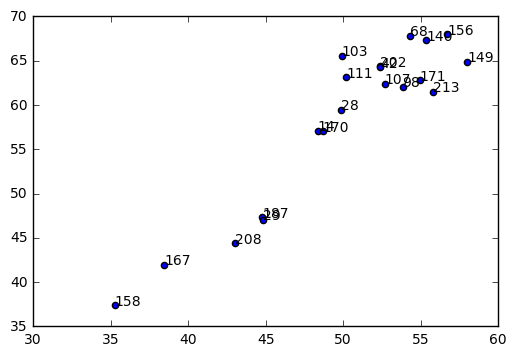

In [139]:


print labels
fig, ax = plt.subplots()
ax.scatter(xs, ys)

for i, txt in enumerate(labels):
    ax.annotate(txt, (xs[i],ys[i]))
    
plt.show()    


[103, 107, 111, 14, 140, 149, 156, 158, 167, 170, 171, 187, 202, 208, 213, 28, 29, 42, 68, 98]


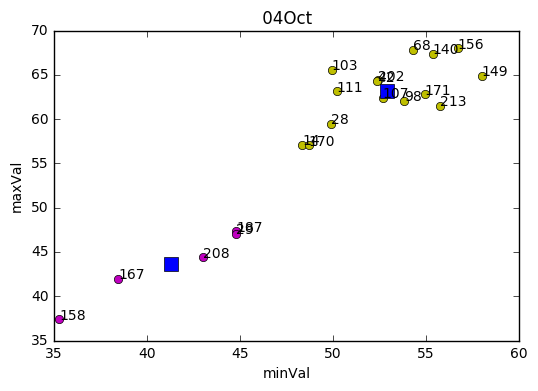

In [140]:
import pylab as P
from pylab import plot,show
from numpy import vstack,array
from scipy.cluster.vq import kmeans,vq

print labels

#xs=PTNdata['P_logsumE_off_FS']
#ys=PTNdata['T_logsumE_off_FS']
#zs=PTNdata['N_logsumE_off_FS']

#merge data into one array
data = np.array([xs,ys]).T

#Determine the cluster means with 3 clusters
centroids,_ = kmeans(data,2)

#2 arrays which information on clusterdata
#vq assigns a code to observations, code can be related to the cluster
idx,_ = vq(data,centroids)
#Colors do not match with previous plots since initializaton of the clusters is 
#done randomly making the order in which the clusters get determined random
for i, txt in enumerate(labels):
    plt.annotate(txt, (xs[i],ys[i]))
plot(data[idx==0,0],data[idx==0,1],'mo',
     data[idx==1,0],data[idx==1,1],'yo') 
plot(centroids[:,0],centroids[:,1],'sb',markersize=10)
P.xlabel('minVal')
P.ylabel('maxVal')

#P.xlim([-14,2])
#P.ylim([-8,1])
#figtext(.05, .03, "The clustered data visualized of Pulse vs Tones.")
plt.title(' 04Oct ')
show()

# 06 OCT

In [145]:
with h5py.File('Difference.h5','r') as hf:
    data4Oct= hf.get('04Oct')
    data6Oct= hf.get('06Oct') 
    xs = map(float, data6Oct[:,1])
    ys = map(float,data6Oct[:,2])
    zs = map(float,data6Oct[:,3])
    labels= map(int, data6Oct[:,0])


[103, 111, 149, 156, 158, 167, 170, 171, 187, 20, 202, 208, 28, 29, 42, 51, 53, 59, 6, 93, 98]


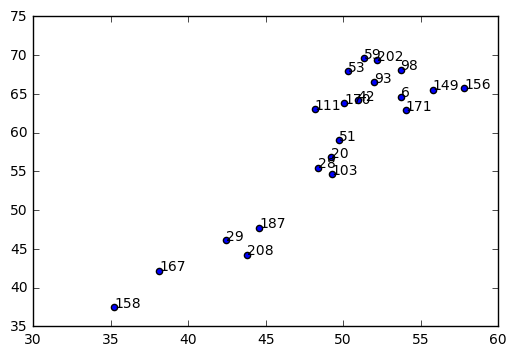

In [146]:
print labels
fig, ax = plt.subplots()
ax.scatter(xs, ys)

for i, txt in enumerate(labels):
    ax.annotate(txt, (xs[i],ys[i]))
    
plt.show() 

[103, 111, 149, 156, 158, 167, 170, 171, 187, 20, 202, 208, 28, 29, 42, 51, 53, 59, 6, 93, 98]


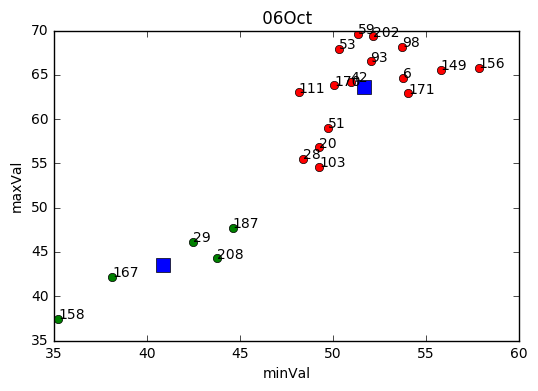

In [150]:
import pylab as P
from pylab import plot,show
from numpy import vstack,array
from scipy.cluster.vq import kmeans,vq

print labels

#xs=PTNdata['P_logsumE_off_FS']
#ys=PTNdata['T_logsumE_off_FS']
#zs=PTNdata['N_logsumE_off_FS']

#merge data into one array
data = np.array([xs,ys]).T

#Determine the cluster means with 3 clusters
centroids,_ = kmeans(data,2)

#2 arrays which information on clusterdata
#vq assigns a code to observations, code can be related to the cluster
idx,_ = vq(data,centroids)
#Colors do not match with previous plots since initializaton of the clusters is 
#done randomly making the order in which the clusters get determined random
for i, txt in enumerate(labels):
    plt.annotate(txt, (xs[i],ys[i]))
plot(data[idx==0,0],data[idx==0,1],'ro',
     data[idx==1,0],data[idx==1,1],'go') 
plot(centroids[:,0],centroids[:,1],'sb',markersize=10)
P.xlabel('minVal')
P.ylabel('maxVal')

#P.xlim([-14,2])
#P.ylim([-8,1])
#figtext(.05, .03, "The clustered data visualized of Pulse vs Tones.")
plt.title(' 06Oct ')
show()